Q1.The Iris dataset is a classic example for demonstrating classification algorithms. It consists of 150 samples of iris flowers belonging to three species: Setosa, Versicolor, and Virginica, with four input features (sepal and petal length/width). Use SVC from sklearn.svm on the Iris dataset and follow the steps below:
a)Load the dataset and perform train–test split (80:20).

In [7]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (120, 4)
Testing data shape: (30, 4)


b)	Train three different SVM models using the following kernels:
Linear, Polynomial (degree=3), RBF
c)	Evaluate each model using:
•	Accuracy
•	Precision
•	Recall
•	F1-Score
d)	Display the confusion matrix for each kernel.
e)	Identify which kernel performs the best and why.

Overall Accuracy: 1.0000

Classification Report for linear:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



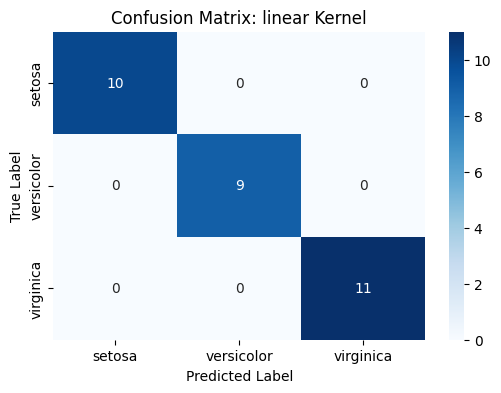

In [9]:
# for linear
linear_model = SVC(kernel='linear')
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Overall Accuracy: {accuracy_linear:.4f}\n")

print("Classification Report for linear:")
print(classification_report(y_test, y_pred_linear, target_names=iris.target_names))

# confusion matrix
cm_linear = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix: linear Kernel')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Overall Accuracy: 1.0000

Classification Report for polynomial:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



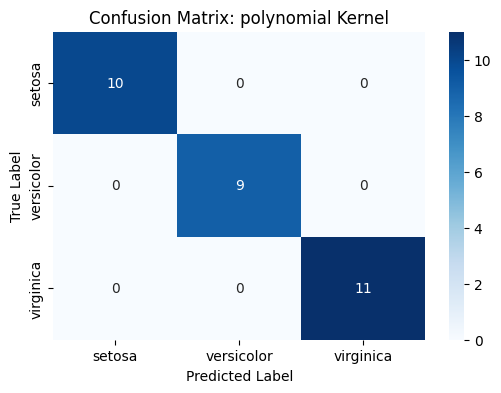

In [11]:
# for poly, degree 3
poly_model = SVC(kernel='poly', degree=3)
poly_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_test)

accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Overall Accuracy: {accuracy_poly:.4f}\n")

print("Classification Report for polynomial:")
print(classification_report(y_test, y_pred_poly, target_names=iris.target_names))

# confusion matrix
cm_poly = confusion_matrix(y_test, y_pred_poly)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_poly, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix: polynomial Kernel')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Overall Accuracy: 1.0000

Classification Report for RBF:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



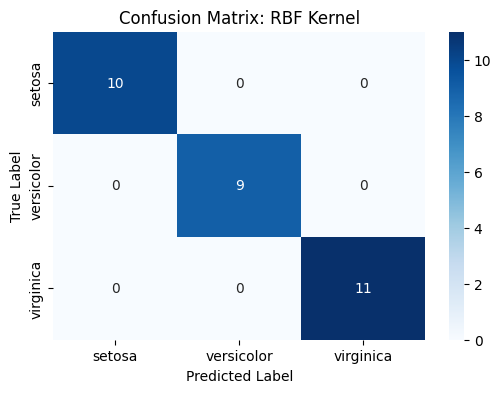

In [13]:
# RBF
rbf_model = SVC(kernel='rbf')
rbf_model.fit(X_train, y_train)

y_pred_rbf = rbf_model.predict(X_test)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Overall Accuracy: {accuracy_rbf:.4f}\n")

print("Classification Report for RBF:")
print(classification_report(y_test, y_pred_rbf, target_names=iris.target_names))

# confusion matrix
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix: RBF Kernel')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Q2.	SVM models are highly sensitive to the scale of input features. When features have different ranges, the algorithm may incorrectly assign higher importance to variables with larger magnitudes, affecting the placement of the separating hyperplane. Feature scaling ensures that all attributes contribute equally to distance-based computations, which is especially crucial for kernels like RBF or polynomial.

A) Use the Breast Cancer dataset from sklearn.datasets.load_breast_cancer.

In [14]:
cancer = datasets.load_breast_cancer()

Train an SVM (RBF kernel) model with and without feature scaling (StandardScaler). Compare both results using:
•	Training accuracy
•	Testing accuracy

In [15]:
X_cancer = cancer.data
y_cancer = cancer.target

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

print(f"Cancer dataset features: {X_cancer.shape[1]}")
print(f"Training data shape: {X_train_c.shape}")
print(f"Testing data shape: {X_test_c.shape}")
#without scaling
model_unscaled = SVC(kernel='rbf')
model_unscaled.fit(X_train_c, y_train_c)

y_pred_train_unscaled = model_unscaled.predict(X_train_c)
train_acc_unscaled = accuracy_score(y_train_c, y_pred_train_unscaled)

y_pred_test_unscaled = model_unscaled.predict(X_test_c)
test_acc_unscaled = accuracy_score(y_test_c, y_pred_test_unscaled)

print(f"Training Accuracy (without scaling): {train_acc_unscaled:.4f}")
print(f"Testing Accuracy (without scaling): {test_acc_unscaled:.4f}")

Cancer dataset features: 30
Training data shape: (455, 30)
Testing data shape: (114, 30)
Training Accuracy (without scaling): 0.9143
Testing Accuracy (without scaling): 0.9474


In [16]:
#with scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_c)
X_test_scaled = scaler.transform(X_test_c)

model_scaled = SVC(kernel='rbf')
model_scaled.fit(X_train_scaled, y_train_c)

y_pred_train_scaled = model_scaled.predict(X_train_scaled)
train_acc_scaled = accuracy_score(y_train_c, y_pred_train_scaled)

y_pred_test_scaled = model_scaled.predict(X_test_scaled)
test_acc_scaled = accuracy_score(y_test_c, y_pred_test_scaled)

print(f"Training Accuracy (Scaled): {train_acc_scaled:.4f}")
print(f"Testing Accuracy (Scaled): {test_acc_scaled:.4f}")

Training Accuracy (Scaled): 0.9890
Testing Accuracy (Scaled): 0.9825
